In [471]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
import scipy.optimize as opt

## Problem 1

In [472]:
#Part(a)
data = scipy.io.loadmat("HW4-ZIP/Keeling_Monthly.mat", squeeze_me = True) #loading in data
ppm = data['ppm']
year = data['year']

no_99_BA = (ppm != -99.99) #taking data where the CO2 is not -99.99 ppm
no_99_ppm = ppm[no_99_BA]
no_99_year = year[no_99_BA]

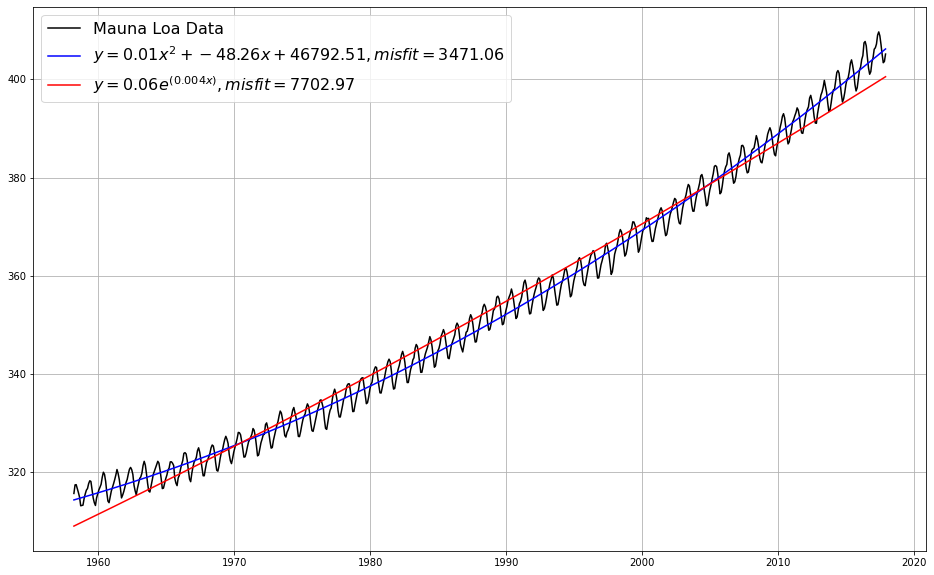

In [473]:
#Plotting Mauna Loa Data and fits (part (b), (c), (d), (e))

plt.figure(figsize = (16, 10))
plt.plot(no_99_year, no_99_ppm, 'k-', label = 'Mauna Loa Data') #raw data

def exponential(x, s): #fit line that is exponential
    #INPUT: x, data we are inputting
    #       s, data we are fitting to
    #OUTPUT: exponential line
    
    #y = Ae^(bx)
    #ln y = ln(A) + bx
    #coeff = np.polyfit(x, ln(y), 1)
    #b = coeff[0]
    #ln(A) = coeff[1]
    #A = e^(coeff[1])
    #y = (e^coeff[1])e^(-coeff[0]x)
    
    coeff = np.polyfit(x, s, 1)
    b = coeff[0]
    A = np.exp(coeff[1])
    y = A*np.exp(b*no_99_year)
    
    return A, b, y

def quadratic(x, s): #fit line that is quadratic
    #INPUT: x, data we are inputting
    #       a, coefficient of highest order
    #       b, coefficient of second order
    #       c, intercept
    #OUTPUT: y, quadratic line
    
    coeff = np.polyfit(x, s, 2)
    y = coeff[0]*x**2 + coeff[1]*x + coeff[2]
    
    return coeff[0], coeff[1], coeff[2], y


a, b, c, quad_y = quadratic(no_99_year, no_99_ppm) #quadratic line
A, B, exp_y = exponential(no_99_year, np.log(no_99_ppm)) #exponential line

def misfit(y1, y2): #misfits
    #INPUT: y1, first y point
    #       y2, second y point
    #OUTPUT: the_sum, sum of the squared residuals = misfit
    
    yresid = y1 - y2
    the_sum = np.sum(yresid **2)
    return the_sum

quad_mis = misfit(quad_y, no_99_ppm) #misfit for quadratic
exp_mis = misfit(exp_y, no_99_ppm) #misfit for exponential

#labels
quad_line = "$y = {0:1.2f}x^2 + {1:1.2f}x + {2:1.2f}, misfit = {3:1.2f}$".format(a, b, c, quad_mis)
exp_line = "$y = {0:1.2f}e^{{({1:1.3f}x)}}, misfit = {2:1.2f}$".format(A, B, exp_mis)

plt.plot(no_99_year, quad_y, 'b-', label = quad_line) #quadratic
plt.plot(no_99_year, exp_y, 'r-', label = exp_line) #exponential
plt.legend(fontsize = 16)
plt.grid()

## Problem 2

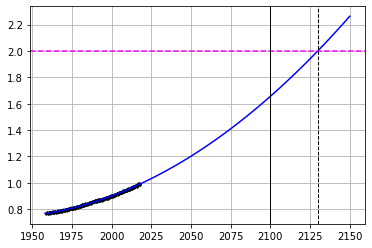

In [474]:
plt.plot(no_99_year, no_99_ppm / np.max(no_99_ppm), 'ko', markersize = 1) #normalizing data based on highest CO2 value
no_99_year_new = list(no_99_year)

while(np.max(no_99_year_new) < 2150): #extending the fit line to 2150
    s = np.max(no_99_year_new) + .2 #adding more years in intervals of .2
    no_99_year_new.append(s)

no_99_year_new = np.array(no_99_year_new)
quad_y_new = a*(no_99_year_new)**2 + b*(no_99_year_new) + c #quadratic fit line
quad_y_new_norm = quad_y_new / np.max(no_99_ppm)
plt.plot(no_99_year_new, quad_y_new_norm, 'b-', label = quad_line) #new quadratic line

double_co2 = 2
plt.axhline(double_co2, color = 'magenta', linestyle = '--') #when CO2 doubles

year_a = 2100
plt.axvline(year_a, color = 'black', linewidth = 1) #when the year is 2100

year_b = 2130
plt.axvline(year_b, color = 'black', linewidth = 1, linestyle = '--') #when the year is 2130

plt.grid(zorder = -2)

#CO2 levels won't increase during or in my hypothetical children's lifetimes

## Problem 3

<ipython-input-475-c11ec4f80e92>:14: RankWarning: Polyfit may be poorly conditioned
  points = poly(d) #points from poly function
<ipython-input-475-c11ec4f80e92>:14: RankWarning: Polyfit may be poorly conditioned
  points = poly(d) #points from poly function
<ipython-input-475-c11ec4f80e92>:14: RankWarning: Polyfit may be poorly conditioned
  points = poly(d) #points from poly function
<ipython-input-475-c11ec4f80e92>:14: RankWarning: Polyfit may be poorly conditioned
  points = poly(d) #points from poly function
<ipython-input-475-c11ec4f80e92>:14: RankWarning: Polyfit may be poorly conditioned
  points = poly(d) #points from poly function


4.540548651877739


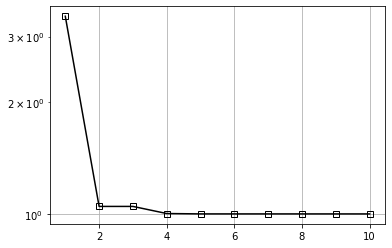

In [475]:
def poly(deg): #polynomial function for higher orders
    #INPUT: deg, degree of function
    #OUTPUT: y, the function line
    
    param = np.polyfit(no_99_year, no_99_ppm, deg) #getting coefficients
    y = np.polyval(param, no_99_year) #outputting y-values
    
    return y

degree = np.arange(1, 11, 1) #degrees 1 to 10
misfits_yea = [] #list to carry misfits

for d in degree:
    points = poly(d) #points from poly function
    the_misfit = misfit(points, no_99_ppm) #calculating misfit between poly function and CO2
    misfits_yea.append(the_misfit) #adding to list
    
norm_misfit = np.array(misfits_yea)  / (misfits_yea[len(misfits_yea) - 1]) #normalizing misfits based on degree 10's misfit
plt.semilogy(degree, norm_misfit, 'ks-', markerfacecolor = 'none')
plt.grid()

#percent difference between d = 10 and quadratic's misfit
difference = np.abs((misfits_yea[len(misfits_yea) - 1] - misfits_yea[1]))/misfits_yea[1] * 100
print(difference)

## Problem 4

(370.0, 390.0)

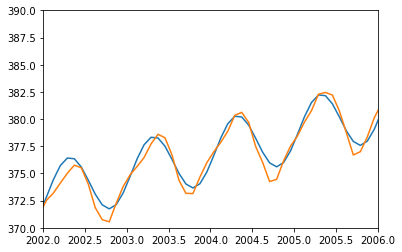

In [476]:
def task4(t, A, B): #sinusoidal function
    #INPUT: t, data being inputted
    #       A, amplitude of sine
    #       B, phase angle
    #OUTPUT: func, the function line
    
    func = quad_y + A * np.sin(2*np.pi*t + B)
    
    return func

guessy_guess = [400, .5] #my guesses for parameters
sin_param, sin_covar = opt.curve_fit(task4, no_99_year, no_99_ppm, p0 = guessy_guess) #getting coefficients for fit line

A = sin_param[0] #amplitude
B = sin_param[1] #phase angle

plt.plot(no_99_year, task4(no_99_year, A, B)) #plotting the smooth curve
plt.plot(no_99_year, no_99_ppm) #raw data

#limiting window
plt.xlim(2002, 2006)
plt.ylim(370, 390)

## The Whole Thing Now!

<ipython-input-477-e11c721b8a36>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(('1', '1.5', '2', '2.5', '3', '3.5', '4'))


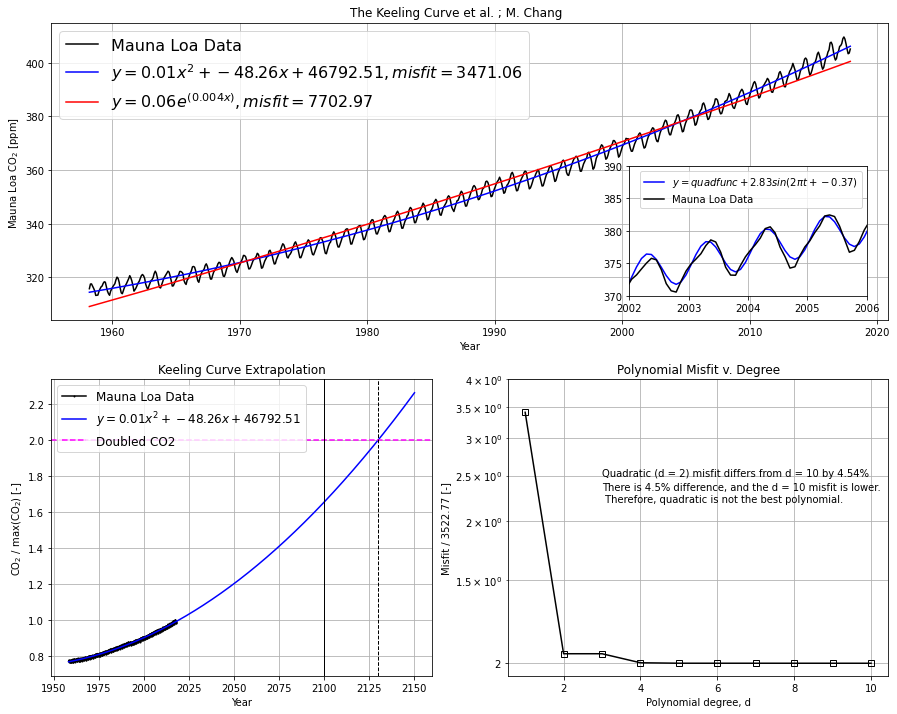

In [477]:
#putting it all together
#Problem 1
fig = plt.figure(figsize = (15,12))
plt.suptitle('The Keeling Curve et al. ; M. Chang', y = 0.9)
fs = 16
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(no_99_year, no_99_ppm, 'k-', label = 'Mauna Loa Data') #raw data
ax1.plot(no_99_year, quad_y, 'b-', label = quad_line) #quadratic
ax1.plot(no_99_year, exp_y, 'r-', label = exp_line) #exponential
ax1.set_xlabel('Year')
ax1.set_ylabel('Mauna Loa CO$_2$ [ppm]')
ax1.legend(fontsize = fs)
ax1.grid()

#Problem 2
ax2 = fig.add_subplot(2, 2, 3)
fs = 12
ax2.plot(no_99_year, no_99_ppm / np.max(no_99_ppm), 'ko-', markersize = 1, label = 'Mauna Loa Data') #normalized raw
ax2.plot(no_99_year_new, quad_y_new_norm, 'b-', label = "$y = {0:1.2f}x^2 + {1:1.2f}x + {2:1.2f}$".format(a, b, c)) #normalized quadratic
ax2.axhline(double_co2, color = 'magenta', linestyle = '--', label = 'Doubled CO2') #where CO2 doubles
ax2.axvline(year_a, color = 'black', linewidth = 1) #year 2100
ax2.axvline(year_b, color = 'black', linewidth = 1, linestyle = '--') #year 2150
ax2.set_xlabel('Year')
ax2.set_ylabel('CO$_2$ / max(CO$_2$) [-]')
ax2.set_title('Keeling Curve Extrapolation')
ax2.grid(zorder = -2)
ax2.legend(fontsize = fs)
#CO2 levels won't increase during or in my hypothetical children's lifetimes

#Problem 3
ax3 = fig.add_subplot(2, 2, 4)
ax3.semilogy(degree, norm_misfit, 'ks-', markerfacecolor = 'none') #misfit v degree of polynomial

#the difference between d = 10 and quadratic misfits and why quadratic isn't the best choice
ax3.text(3, 2.5, 'Quadratic (d = 2) misfit differs from d = 10 by {0:1.2f}%'.format(difference))
ax3.text(3, 2.2, 'There is 4.5% difference, and the d = 10 misfit is lower. \n Therefore, quadratic is not the best polynomial.')

ax3.set_xlabel('Polynomial degree, d')
ax3.set_ylabel('Misfit / {0:1.2f} [-]'.format(misfits[len(misfits) - 1]))
ax3.set_title('Polynomial Misfit v. Degree')

#changing the y ticks (not the exact same but I tried)
yticks = [1, 1.5, 2, 2.5, 3, 3.5, 4]
ax3.set_yticks(yticks, minor = True)
ax3.set_yticklabels(('1', '1.5', '2', '2.5', '3', '3.5', '4'))
ax3.grid(which = 'both')

#Problem 4 and placing graph into the first graph

#size and location of graph in first graph
left, bottom, width, height = [0.66, 0.565, 0.22, 0.15]
inset_dimensions = [left, bottom, width, height]

ax4 = fig.add_axes(inset_dimensions)
ax4.plot(no_99_year, task4(no_99_year, A, B), 'b-', label = '$y = quadfunc + {0:1.2f}sin(2\pi t + {1:1.2f})$'.format(A, B)) #sinusoidal function + quad
ax4.plot(no_99_year, no_99_ppm, 'k-', label = "Mauna Loa Data") #raw data
ax4.set_xlim(2002, 2006)
ax4.set_ylim(370, 390)
ax4.legend()
ax4.grid()

plt.savefig('Chang_KeelingCurve.png', dpi = 150)